In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 사용을 위해서 세팅
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
df=pd.read_csv("../Integrated_data/all_dataset.csv",encoding="utf-8")

In [3]:
df.head()

,ID,collect_datetime,gender,grade,height,weight,step_count,burned calory,eat_calory,Sleep_time,before_height,before_weight,before_waist,after_height,after_weight,after_waist
0,#AAGQKY,2022-07-14,2.0,4.0,148.0,45.15,72.0,8.877,2000.0,12.0,148.0,45.3,-,148.0,45.0,NaN
1,#AAGQKY,2022-07-15,2.0,4.0,148.0,45.15,72.0,8.877,2000.0,12.0,148.0,45.3,-,148.0,45.0,NaN
2,#AAGQKY,2022-07-16,2.0,4.0,148.0,45.15,72.0,8.877,2000.0,12.0,148.0,45.3,-,148.0,45.0,NaN
3,#AAGQKY,2022-07-17,2.0,4.0,148.0,45.15,72.0,8.877,2000.0,12.0,148.0,45.3,-,148.0,45.0,NaN
4,#AAGQKY,2022-07-18,2.0,4.0,148.0,45.15,72.0,8.877,2000.0,12.0,148.0,45.3,-,148.0,45.0,NaN


# 남자, 여자 비율

In [4]:
value_counts=df['gender'].value_counts()

In [5]:
# 남자, 여자 비율 계산
value_percentages = (value_counts / len(df)) * 100

In [6]:
value_percentages

2.0    58.409786
1.0    41.590214
Name: gender, dtype: float64

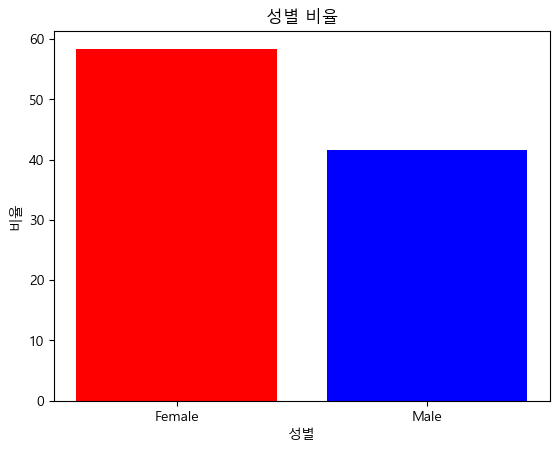

In [7]:
# 데이터 예시
categories = ['Female', 'Male']
values = value_percentages
colors=['red','blue']
# 막대그래프 그리기
plt.bar(categories, values,color=colors)

# 그래프 제목과 축 레이블 추가
plt.title('성별 비율')
plt.xlabel('성별')
plt.ylabel('비율')

# 그래프 표시
plt.show()


# BMI 계산

In [8]:
def calculate_bmi(df):
    df['bmi']=df['weight']/((df['height']*0.01)**2)
    return df

In [9]:
# 남아 기준 0.44 여아기준 0.43 이면 대사증후군이다.
def waist_bmi(df):
    df['waist_bmi']=df['before_weight']/df['height']
    return df

In [10]:
new_df=calculate_bmi(df)
new_df=waist_bmi(new_df)

In [11]:
new_df
new_df.to_csv("../Integrated_data/all_dataset2.csv",encoding="utf-8",index=False)

In [12]:
# 허리둘레 기준 비만으로 볼 수 있는 아이디
df[df['waist_bmi'] >= 0.43]['ID'].unique()

array(['#ATSLUP', '#EJCZKI', '#EMMRWD', '#KPADZN', '#MZVDYG', '#WWVCBL',
       '#YDHUVM', '#ZAJBPK', '#ZZLSSL'], dtype=object)

In [13]:
#bmi 기준 비만에 해당하는 아이디
df[df['bmi'] >= 25]['ID'].unique()

array(['#ATSLUP', '#BRJFDA', '#BYJNBA', '#EJCZKI', '#ELFNZG', '#EMMRWD',
       '#EOBGAT', '#EYRMXX', '#FDDNET', '#IUAZSD', '#JAILCA', '#JGRTRZ',
       '#KPADZN', '#MXMPCG', '#MZVDYG', '#NPYNVO', '#PELXYS', '#PJXHJY',
       '#PPKKCN', '#QDOANU', '#RWYAMP', '#UPNVNH', '#VCAOUI', '#WTZJIP',
       '#WWVCBL', '#YDHUVM', '#YHKCQS', '#ZAJBPK', '#ZHWQTF', '#ZZLSSL'],
      dtype=object)

In [14]:
len(new_df['ID'].unique())

327

In [15]:
new_df.isnull().sum()

ID                      0
collect_datetime        0
gender                  0
grade                   0
height                  0
weight                  0
step_count              0
burned calory           0
eat_calory              0
Sleep_time              0
before_height         546
before_weight         546
before_waist          546
after_height         2002
after_weight         2002
after_waist         25844
bmi                     0
waist_bmi             546
dtype: int64

In [16]:
# 널값이 있는 행 확인
null_rows = df[df.isnull().any(axis=1)]

# 널값이 있는 행의 아이디(ID) 확인
null_ids = null_rows['ID']

print("널값이 있는 행:")
print(null_rows)

print("\n널값이 있는 행의 아이디(ID):")
print(null_ids.unique())

널값이 있는 행:
            ID collect_datetime  gender  grade  height  weight  step_count  \
0      #AAGQKY       2022-07-14     2.0    4.0   148.0   45.15        72.0   
1      #AAGQKY       2022-07-15     2.0    4.0   148.0   45.15        72.0   
2      #AAGQKY       2022-07-16     2.0    4.0   148.0   45.15        72.0   
3      #AAGQKY       2022-07-17     2.0    4.0   148.0   45.15        72.0   
4      #AAGQKY       2022-07-18     2.0    4.0   148.0   45.15        72.0   
...        ...              ...     ...    ...     ...     ...         ...   
59145  #ZRKRKP       2023-01-07     1.0    4.0   129.3   28.80      3601.8   
59146  #ZRKRKP       2023-01-08     1.0    4.0   129.3   28.80      2443.2   
59147  #ZRKRKP       2023-01-09     1.0    4.0   129.3   28.80      1284.6   
59148  #ZRKRKP       2023-01-10     1.0    4.0   129.3   28.80       126.0   
59149  #ZRKRKP       2023-01-11     1.0    4.0   129.3   28.80       126.0   

       burned calory  eat_calory  Sleep_time  before_

In [17]:
new_df['after_waist']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
59509    91.1
59510    91.1
59511    91.1
59512    91.1
59513    91.1
Name: after_waist, Length: 59514, dtype: float64

In [18]:
len(null_ids.unique())

142